# 0. Preliminaries
## Importing all necessary libraries

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv('on_analiz_veri_04072021.csv', delimiter=';')
data.head()

,signal_type,amplitude,first_epoch_sec,noe_sec,min_elev_deg,elev_range_deg,mean_azim_deg,bgn_ratio,decision,est_rh_m,insitu_rh_m,abs_diff_cm,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,13.8459,30156,3400,10.0406,19.9416,295.13860,5.183013,1,2.168,2.091,7.7,NaN,NaN,NaN
1,0,14.2413,33682,3559,10.1297,19.8557,257.43080,4.708335,0,2.095,2.091,0.4,NaN,NaN,NaN
2,0,12.6454,38400,2841,10.0160,19.9662,214.69915,4.742855,1,2.006,2.091,8.5,NaN,NaN,NaN
3,0,11.5375,24369,1522,19.7925,10.1955,311.11315,3.691173,0,2.069,2.091,2.2,NaN,NaN,NaN
4,0,10.9512,38549,2897,10.0013,19.9924,197.23230,4.938757,0,2.089,2.091,0.2,NaN,NaN,NaN


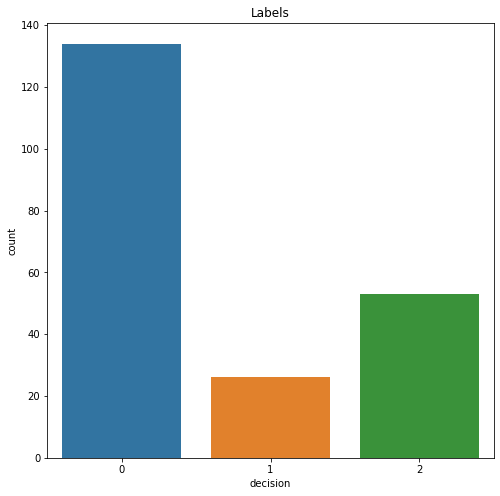

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot('decision', data=data)
plt.title('Labels')
plt.show()

## Selecting Features and Labels 

In [4]:
X = data.iloc[:,0:8].values  # Independent variables
y = data['decision'].values  # Dependent variable

## Split dataset into random train and test subsets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

## Standardize features by removing mean and scaling to unit variance:

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# 1. KNN Classifier

## Hyper-parameter Optimization

In [7]:
classifier_KNN = KNeighborsClassifier()
parameter_space = {
    'n_neighbors': [2,5,10,20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5,10,20,30,50],
    'p': [1,2]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier_KNN, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.741 (+/-0.019) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.735 (+/-0.055) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.706 (+/-0.031) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.706 (+/-0.094) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.717 (+/-0.107) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.729 (+/-0.085) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.682 (+/-0.154) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.712 (+/-0.129) for {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.712 (+/-0.090) for {'algor

## Use the KNN classifier to fit data

In [8]:
classifier_KNN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 5, n_neighbors = 20, p = 1, weights = 'distance' )
classifier_KNN.fit(X_train, y_train) 

KNeighborsClassifier(leaf_size=5, n_neighbors=20, p=1, weights='distance')

## Predict y data with classifier

In [9]:
y_predict_KNN = classifier_KNN.predict(X_test)
print(y_predict_KNN)
print(y_test)

[0 2 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2 2 0 2 0 0 0 2 2 0 0 0 2 0 0 2
 0 1 0 0 0 0]
[0 2 0 0 0 0 0 2 0 0 1 1 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2
 0 0 0 0 0 0]


## Print Results


[[25  1  7]
 [ 4  0  0]
 [ 1  0  5]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.00      0.00      0.00         4
           2       0.42      0.83      0.56         6

    accuracy                           0.70        43
   macro avg       0.42      0.53      0.45        43
weighted avg       0.70      0.70      0.69        43



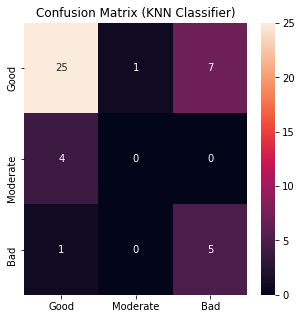

In [10]:
print(confusion_matrix(y_test, y_predict_KNN))
print(classification_report(y_test, y_predict_KNN)) 



df_cm_KNN = pd.DataFrame(confusion_matrix(y_test, y_predict_KNN), index = [i for i in ["Good", 'Moderate', 'Bad']],
                  columns = [i for i in ["Good", 'Moderate', 'Bad']])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix (KNN Classifier)')
sns.heatmap(df_cm_KNN, annot=True)

# 2. Logistic Regression Classifier

## Hyper-parameter Optimization

In [13]:
classifier_LR = LogisticRegression()
parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-5,1e-4, 1e-3, 1e-2, 1e-1],
    'C': [0.1,0.25,0.5,1],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier_LR, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'C': 0.25, 'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 1e-05}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.0001}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.001}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.01}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.1}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1e-05}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.0001}
nan (+/-nan) for {'C': 0.1, 'dual': True, 'fit_interce

## Use the Logistic Regression classifier to fit data

In [14]:
classifier_LR = LogisticRegression(C=0.25, dual = False, fit_intercept = True, penalty = 'l1', solver = 'saga', tol = 0.01)
classifier_LR.fit(X_train, y_train) 

LogisticRegression(C=0.25, penalty='l1', solver='saga', tol=0.01)

## Predict y data with classifier

In [15]:
y_predict_LR = classifier_LR.predict(X_test)
print(y_predict_LR)
print(y_test)

[0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0
 0 0 0 0 0 0]
[0 2 0 0 0 0 0 2 0 0 1 1 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2
 0 0 0 0 0 0]


## Print Results

[[28  0  5]
 [ 4  0  0]
 [ 3  0  3]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.00      0.00      0.00         4
           2       0.38      0.50      0.43         6

    accuracy                           0.72        43
   macro avg       0.39      0.45      0.42        43
weighted avg       0.67      0.72      0.69        43



C:\Users\muzaf\anacondacan\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


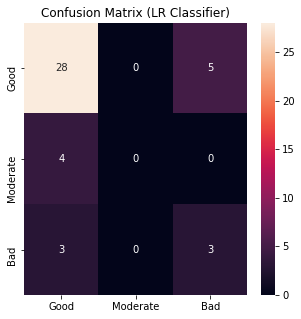

In [16]:
print(confusion_matrix(y_test, y_predict_LR))
print(classification_report(y_test, y_predict_LR)) 

df_cm_LR= pd.DataFrame(confusion_matrix(y_test, y_predict_LR), index = [i for i in ["Good", 'Moderate', 'Bad']],
                  columns = [i for i in ["Good", 'Moderate', 'Bad']])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix (LR Classifier)')
sns.heatmap(df_cm_LR, annot = True)

## 3. Support Vector Machine Classifier

## Hyper-parameter Optimization

In [22]:
classifier_SVC = SVC()
parameter_space = {
    'C': [0.1,0.25,0.5,1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale','auto'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier_SVC, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'C': 0.25, 'gamma': 'scale', 'kernel': 'linear'}
0.741 (+/-0.019) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.694 (+/-0.043) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.594 (+/-0.007) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.694 (+/-0.036) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.741 (+/-0.019) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.694 (+/-0.043) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
0.594 (+/-0.007) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.694 (+/-0.036) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.753 (+/-0.033) for {'C': 0.25, 'gamma': 'scale', 'kernel': 'linear'}
0.694 (+/-0.043) for {'C': 0.25, 'gamma': 'scale', 'kernel': 'poly'}
0.700 (+/-0.052) for {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
0.682 (+/-0.062) for {'C': 0.25, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.753 (+/-0.033) for {'C': 0.25, 'gamma': 'auto', 'kernel': 'linear'}
0.700 (+/-0.029) for {'C': 0

## Use the Support Vector classifier to fit data

In [23]:
classifier_SVC = SVC(C=0.25, gamma = 'scale', kernel = 'linear')
classifier_SVC.fit(X_train, y_train) 

SVC(C=0.25, kernel='linear')

## Predict y data with classifier

In [24]:
y_predict_SVC = classifier_SVC.predict(X_test)
print(y_predict_SVC)
print(y_test)

[0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 2 2 0 0 2 0 0 2
 0 0 0 0 0 0]
[0 2 0 0 0 0 0 2 0 0 1 1 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2
 0 0 0 0 0 0]


## Print Results

[[27  0  6]
 [ 4  0  0]
 [ 2  0  4]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.00      0.00      0.00         4
           2       0.40      0.67      0.50         6

    accuracy                           0.72        43
   macro avg       0.41      0.49      0.44        43
weighted avg       0.68      0.72      0.70        43



C:\Users\muzaf\anacondacan\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


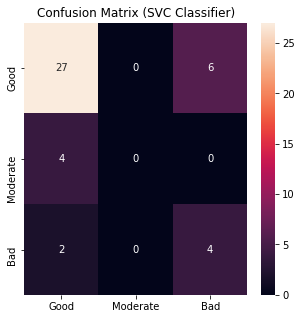

In [25]:
print(confusion_matrix(y_test, y_predict_SVC))
print(classification_report(y_test, y_predict_SVC)) 

df_cm_SVC= pd.DataFrame(confusion_matrix(y_test, y_predict_SVC), index = [i for i in ["Good", 'Moderate', 'Bad']],
                  columns = [i for i in ["Good", 'Moderate', 'Bad']])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix (SVC Classifier)')
sns.heatmap(df_cm_SVC, annot = True)

## 4. Random Forest Classifier

## Hyper-Parameter Optimization

In [26]:
classifier_RF = RandomForestClassifier()
parameter_space = {
    'n_estimators': [20,50,100,200,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier_RF, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200}
0.729 (+/-0.036) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 20}
0.741 (+/-0.040) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.718 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
0.730 (+/-0.029) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 200}
0.706 (+/-0.031) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 500}
0.759 (+/-0.057) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}
0.759 (+/-0.031) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.771 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.777 (+/-0.013) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200}
0.771 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 500}
0.718 (+/-0.033) for {'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 20}
0.712 (+/-0.061) for {'criterion': 'ent

## Use the Random Forest classifier to fit data

In [27]:
classifier_RF = RandomForestClassifier(criterion = 'gini', max_depth = 2, n_estimators = 200)
classifier_RF.fit(X_train, y_train) 

RandomForestClassifier(max_depth=2, n_estimators=200)

## Predict y data with classifier

In [28]:
y_predict_RF = classifier_RF.predict(X_test)
print(y_predict_RF)
print(y_test)

[0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0
 0 0 0 0 0 0]
[0 2 0 0 0 0 0 2 0 0 1 1 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2
 0 0 0 0 0 0]


## Print Results

[[29  0  4]
 [ 4  0  0]
 [ 3  0  3]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.00      0.00      0.00         4
           2       0.43      0.50      0.46         6

    accuracy                           0.74        43
   macro avg       0.41      0.46      0.43        43
weighted avg       0.68      0.74      0.71        43



C:\Users\muzaf\anacondacan\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


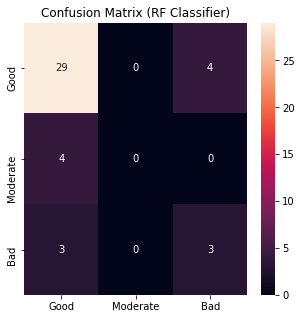

In [29]:
print(confusion_matrix(y_test, y_predict_RF))
print(classification_report(y_test, y_predict_RF)) 

df_cm_RF= pd.DataFrame(confusion_matrix(y_test, y_predict_RF), index = [i for i in ["Good", 'Moderate', 'Bad']],
                  columns = [i for i in ["Good", 'Moderate', 'Bad']])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix (RF Classifier)')
sns.heatmap(df_cm_RF, annot = True)